# Evaluation of the TimeSeries class

In [4]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt


from timeseries import TimeSeries

In [2]:
def dummy_score(ts):
    mean = np.mean(ts)
    u = np.sum([(ts[i] - ts[i-1])**2 for i in range(0, len(ts)-1)])
    v = np.sum([(ts[i] - mean)**2 for i in range(0, len(ts)-1)])
    score = 1 - u/v
    return score

Load sample data: Mauna Loa Weekly Atmospheric CO2 Data

In [14]:
co2  = sm.datasets.co2.load_pandas()
data = co2.data.dropna(axis=0).values.flatten()

In [15]:
data

array([316.1, 317.3, 317.6, ..., 371.2, 371.3, 371.5])

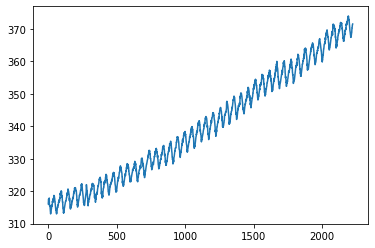

In [16]:
plt.plot(data)

### Miscoding

In [5]:
ts = TimeSeries()

In [6]:
ts.fit(data)

Auto-miscoding

In [7]:
mscd = ts.auto_miscoding()

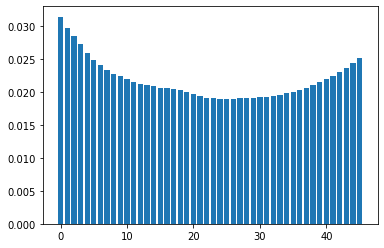

In [18]:
plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.show()

Cross-miscoding

In [19]:
mdata = sm.datasets.macrodata.load_pandas().data

In [22]:
mdata = mdata.drop(["year", "quarter"], axis=1)

In [23]:
mdata

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
198,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [27]:
ts = TimeSeries(multivariate=True)

ValueError: Valid options for 'X_type' are ('numeric', 'mixed', 'categorical'). Got vartype=None instead.

In [26]:
ts.fit(data)

## Linear model

In [3]:
data = [x + np.random.randn() for x in range(1, 100)]

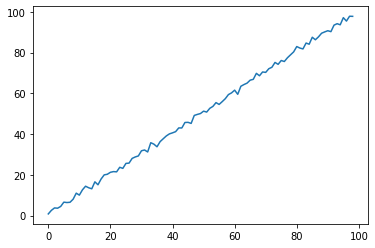

In [4]:
plt.plot(data)

In [5]:
dummy_score(data)

NameError: name 'dummy_score' is not defined

In [9]:
model = AutoTimeSeries()

In [10]:
model.fit(data)

AutoTimeSeries()

In [11]:
model.score(data)

0.9974547239555092

In [13]:
type(model.get_model())

sklearn.linear_model._base.LinearRegression

In [15]:
model.score(data)

0.9974547239555092

## Additive Model

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [18]:
rcParams['figure.figsize'] = 10, 5

In [19]:
x = 1
data = [0] * 100
data[0] = 1
for i in range(1, 100):
   data[i] = data[i-1] + np.random.randn()

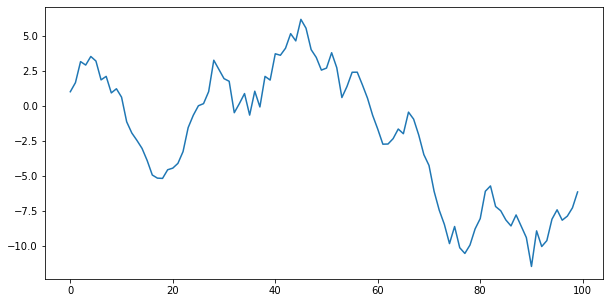

In [20]:
plt.plot(data)

In [22]:
dummy_score(data)

0.9242560612608894

In [23]:
from fastautoml.fastautoml import AutoTimeSeries

In [24]:
model = AutoTimeSeries()

In [25]:
model.fit(data)

AutoTimeSeries()

In [26]:
model.score(data)

0.9494841195197082

In [27]:
model.score(data)

0.9494841195197082

## Multiplicative Model

In [28]:
x = 1
data = [0] * 100
data[0] = 1
for i in range(1, 100):
   data[i] = data[i-1] * np.random.randn()

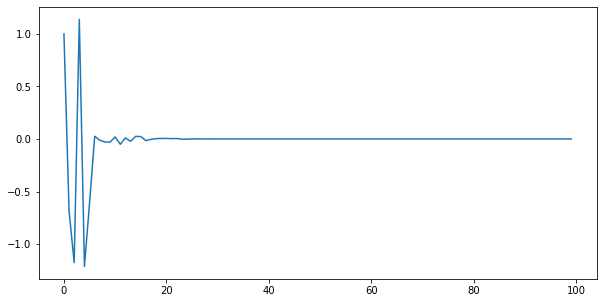

In [29]:
plt.plot(data)

In [31]:
dummy_score(data)

-1.6362472488415096

In [32]:
from fastautoml.fastautoml import AutoTimeSeries

In [33]:
model = AutoTimeSeries()

In [34]:
model.fit(data)

AutoTimeSeries()

In [35]:
model.score(data)

-2.1610434661286515

In [36]:
model.score(data)

-2.1610434661286515

## Air Passangers